2: Implementing Feedforward neural networks with Keras and TensorFlow
<br>
a. Import the necessary packages
<br>
b. Load the training and testing data (MNIST/CIFAR10)
<br>
c. Define the network architecture using Keras
<br>
d. Train the model using SGD
<br>
e. Evaluate the network
<br>
f. Plot the training loss and accuracy
<br>

**datasets: MNIST, CIFER10**

#### a. Import the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#### b. Load the training and testing data (MNIST/CIFAR10)

#### Note: Decrease batch size and remove some layers if epoch takes to much time to run

In [2]:
train_data_dir = 'Datasets/cifar-10-img/train'
test_data_dir = 'Datasets/cifar-10-img/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=train_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=test_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


#### Selecting first batch containing 20000 images 

In [3]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

#### c. Define the network architecture using Keras

#### Note: remove some layers if epoch takes to much time to run

In [5]:
# number of classes
K = len(set(y_train))
# calculate total number of classes 
# for output layer
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

number of classes: 10


#### d. Train the model using SGD

In [6]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 13s 8ms/step - loss: 1.7444 - accuracy: 0.4065 - val_loss: 1.4437 - val_accuracy: 0.4890
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 1.2559 - accuracy: 0.5498 - val_loss: 1.2374 - val_accuracy: 0.5650
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 1.0624 - accuracy: 0.6170 - val_loss: 1.2119 - val_accuracy: 0.5940
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.9182 - accuracy: 0.6732 - val_loss: 1.0140 - val_accuracy: 0.6630
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.7980 - accuracy: 0.7174 - val_loss: 1.0961 - val_accuracy: 0.6480
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.6940 - accuracy: 0.7556 - val_loss: 0.9139 - val_accuracy: 0.6930
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.6175 - accuracy: 0.7822 - val_loss: 0.8786 - val_accuracy: 0.7090
Epoch

#### e. Evaluate the network

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

32/32 [==============================] - 0s 3ms/step - loss: 0.9198 - accuracy: 0.7050
Loss:  0.9198089838027954
Accuracy:  0.7049999833106995


In [8]:
import matplotlib.pyplot as plt
y = to_categorical(y_test)
predicted_value = model.predict(x_test)

32/32 [==============================] - 0s 2ms/step


In [9]:
labels = list(test_generator.class_indices.keys())

#### Change n to test for other images

Actual Number:  automobile
Predicted Number:  automobile


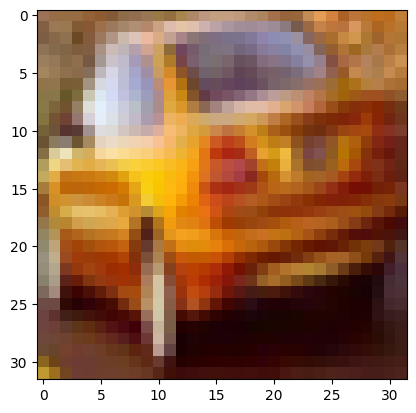

In [10]:
n = 12
plt.imshow(x_test[n])
print("Actual Number: ",labels[np.argmax(y[n])])
print("Predicted Number: ", labels[np.argmax(predicted_value[n])])

#### f. Plot the training loss and accuracy

In [11]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

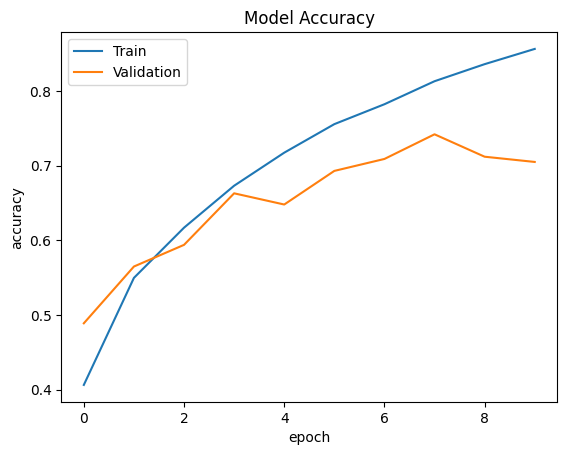

In [12]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

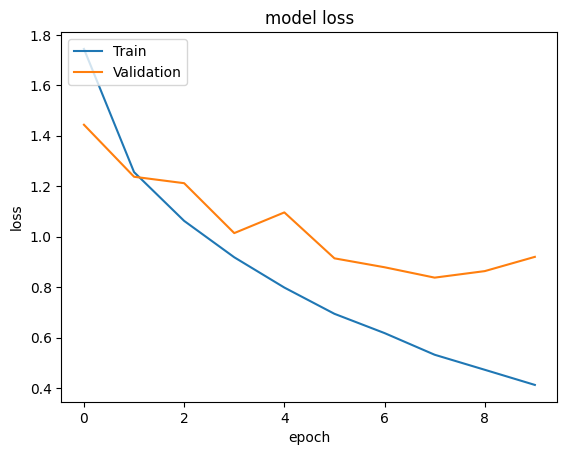

In [13]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

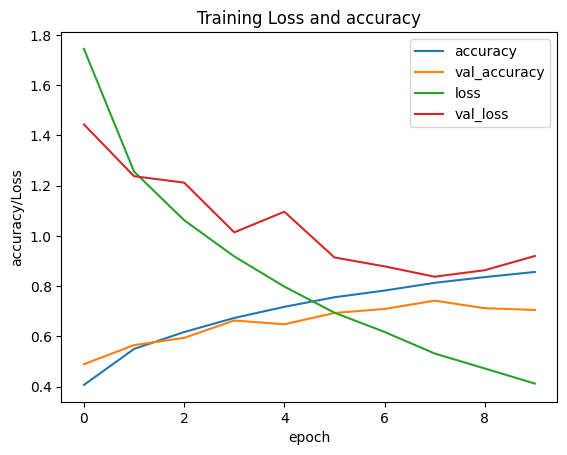

In [14]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])